In [39]:
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import re

import matplotlib.axes as axes
import matplotlib.pyplot as plt
# from google.colab import files

import pandas as pd
import glob
import os

import scipy

In [40]:
# -------------------------------------------------
# Matplotlib settings for thicker lines & bigger fonts
# -------------------------------------------------
plt.rcParams.update({
    'font.size': 18,          # Default text size
    'axes.labelsize': 18,     # Axis label size
    'axes.titlesize': 20,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'lines.linewidth': 2,     # Thicker lines by default
    'lines.markersize': 9,
    'axes.linewidth': 2,
    'xtick.major.size': 10,
    'xtick.major.width': 2,
    'ytick.major.size': 10,
    'ytick.major.width': 2,
    'xtick.minor.size': 5,
    'xtick.minor.width': 1,
    'ytick.minor.size': 5,
    'ytick.minor.width': 1
})

In [41]:
directory = "/Users/jorgegarciaponce/Desktop/Classes/Senior Spring/Physics 191/Plasma/athalia and jorge's data/900v plasma white spectrometer"
neg_files = glob.glob(os.path.join(directory, "*mtorr.txt"))

data = {}
for file in neg_files:
    # Load the file's data
    df = np.loadtxt(file, skiprows=1)
    
    # Get just the filename
    filename = os.path.basename(file)
    
    # Use regex to extract the pressure value (e.g. "151.5")
    match = re.search(r'(\d+\.\d+)\s*mtorr', filename)
    if match:
        pressure = match.group(1)  # This is the extracted pressure as a string
        data[pressure] = df
    else:
        print("Pressure value not found in filename:", filename)

# Now, data's keys are just the pressure values extracted from the filenames.


In [42]:

data['150.7']

array([[ 339.441, 1672.   ],
       [ 339.794, 1696.   ],
       [ 340.147, 1745.   ],
       ...,
       [1017.031, 1571.   ],
       [1017.34 , 1579.   ],
       [1017.649, 1591.   ]], shape=(2048, 2))

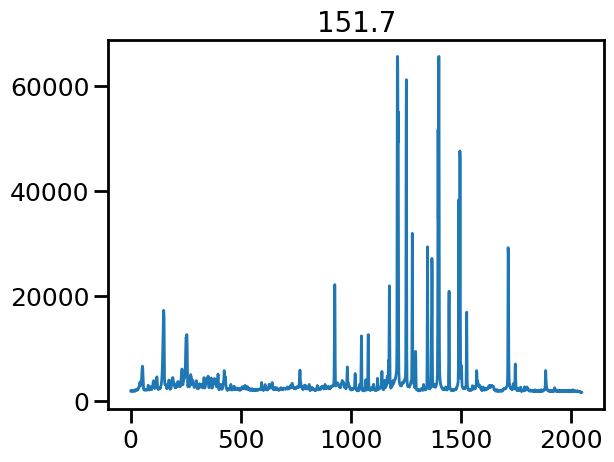

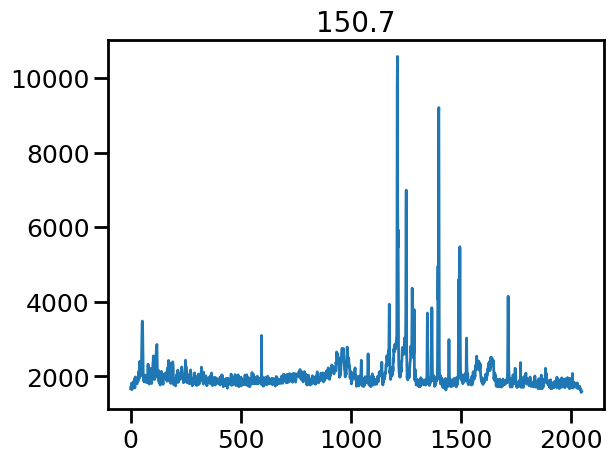

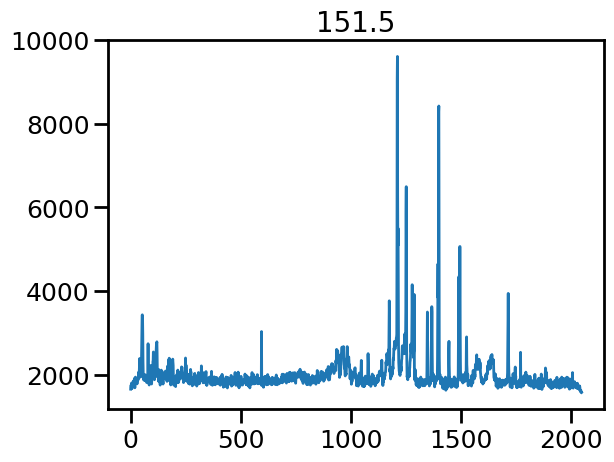

In [45]:
for key, value in data.items():

    plt.plot(value[:,1])
    plt.title(key)
    # plt.xlim(550,600)
    # plt.ylim(0, 5000)
    plt.show()



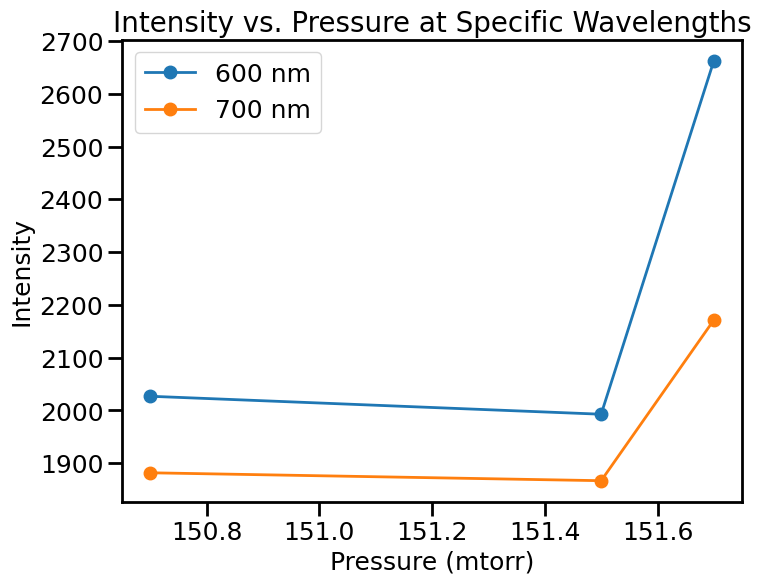

In [20]:
# Define the wavelengths (in nm) at which you want to track intensity
desired_wavelengths = [600, 700]  # Replace with your desired wavelength values

# Get a sorted list of pressures (converted to floats for proper numerical sorting)
sorted_pressures = sorted([float(p) for p in data.keys()])

# Prepare a dictionary to hold the intensity vs pressure data for each desired wavelength
intensities = {wl: [] for wl in desired_wavelengths}

# Loop over pressures in sorted order, extract intensity at the desired wavelength from each file
for p in sorted_pressures:
    # Find the corresponding key in data (as keys are stored as strings)
    # Here we assume that the float conversion gives us a unique match.
    key = None
    for k in data.keys():
        if np.isclose(float(k), p):
            key = k
            break
    if key is None:
        continue  # skip if no matching key

    # Get the spectrum for this pressure
    spectrum = data[key]
    wavelengths = spectrum[:, 0]
    intens_vals = spectrum[:, 1]
    
    # For each desired wavelength, use interpolation to get the intensity
    for wl in desired_wavelengths:
        intensity_at_wl = np.interp(wl, wavelengths, intens_vals)
        intensities[wl].append(intensity_at_wl)

# Now plot intensity vs pressure for each desired wavelength
plt.figure(figsize=(8, 6))
for wl in desired_wavelengths:
    plt.plot(sorted_pressures, intensities[wl], marker='o', label=f'{wl} nm')

plt.xlabel('Pressure (mtorr)')
plt.ylabel('Intensity')
plt.title('Intensity vs. Pressure at Specific Wavelengths')
plt.legend()
plt.show()